# Finger 1

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Cargo data, reviso, etc
train = pd.read_csv('train.csv')
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
test = pd.read_csv('test.csv')
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
id          3263 non-null int64
keyword     3237 non-null object
location    2158 non-null object
text        3263 non-null object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [ ]:
ss = pd.read_csv('sample_submission.csv')
ss

In [ ]:
ss.info()

In [16]:
train.describe(include='all')#;

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [18]:
test.describe(include='all')

,id,keyword,location,text
count,3263.000000,3237,2158,3263
unique,NaN,221,1602,3243
top,NaN,deluged,New York,11-Year-Old Boy Charged With Manslaughter of T...
freq,NaN,23,38,3
mean,5427.152927,NaN,NaN,NaN
std,3146.427221,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,2683.000000,NaN,NaN,NaN
50%,5500.000000,NaN,NaN,NaN
75%,8176.000000,NaN,NaN,NaN


In [19]:
train.duplicated().sum()

0

In [20]:
test.duplicated().sum()

0

### Train. Distribución 

Text(0.5, 0.98, 'TRAIN')

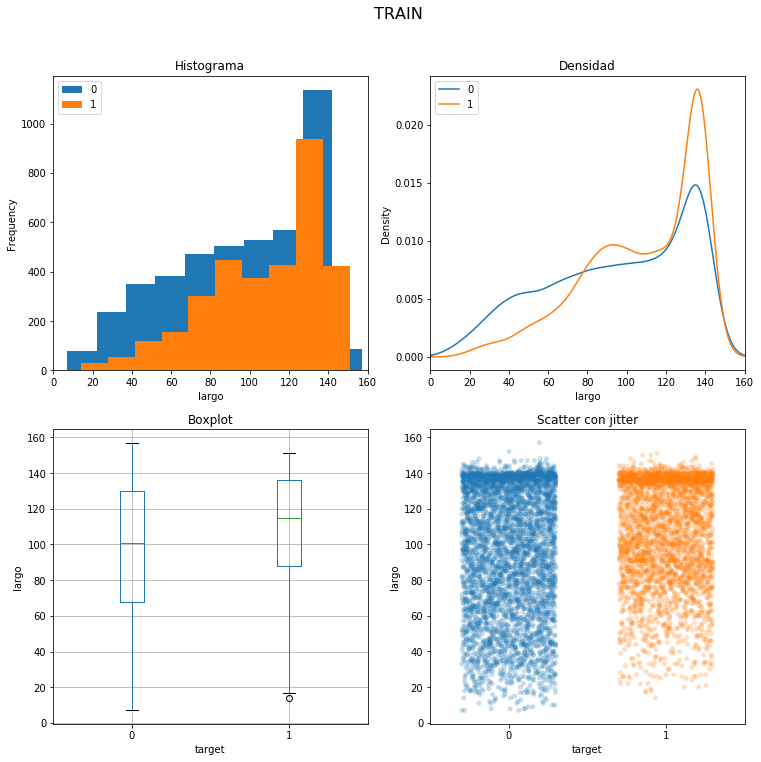

In [33]:
# Creo columna con longitud de cada texto
train['largo'] = train['text'].str.len()
# chequeo: train.sort_values(by='largo')

# Agrupo por target
grouped = train.groupby(['target'])
# chequeo estadísticos: grouped.agg({'largo':'describe'}) 

# Grafico
fig = plt.figure()

ax1 = fig.add_subplot(221)
grouped['largo'].plot(
    kind='hist', title='Histograma', legend=True, xlim=(0, 160), figsize=(12,12))
ax1.set_xlabel('largo')

ax2 = fig.add_subplot(222)
grouped['largo'].plot(
    x='largo', kind='kde', title='Densidad', legend=True, xlim=(0, 160), figsize=(12,12))
ax2.set_xlabel('largo')

ax3 = fig.add_subplot(223)
train.boxplot(
    by='target', column='largo', ax=ax3, figsize=(12,12))
ax3.set_title('Boxplot'), ax3.set_xlabel('target'), ax3.set_ylabel('largo')

ax4 = fig.add_subplot(224)
sns.stripplot(x='target',y='largo', data=train, alpha=0.25, jitter=0.3)#,figsize=(12,8));
ax4.set_title('Scatter con jitter')

fig.suptitle('TRAIN', fontsize=16)
#plt.show()

### TEST. Distribución

Text(0.5, 0.98, 'TEST')

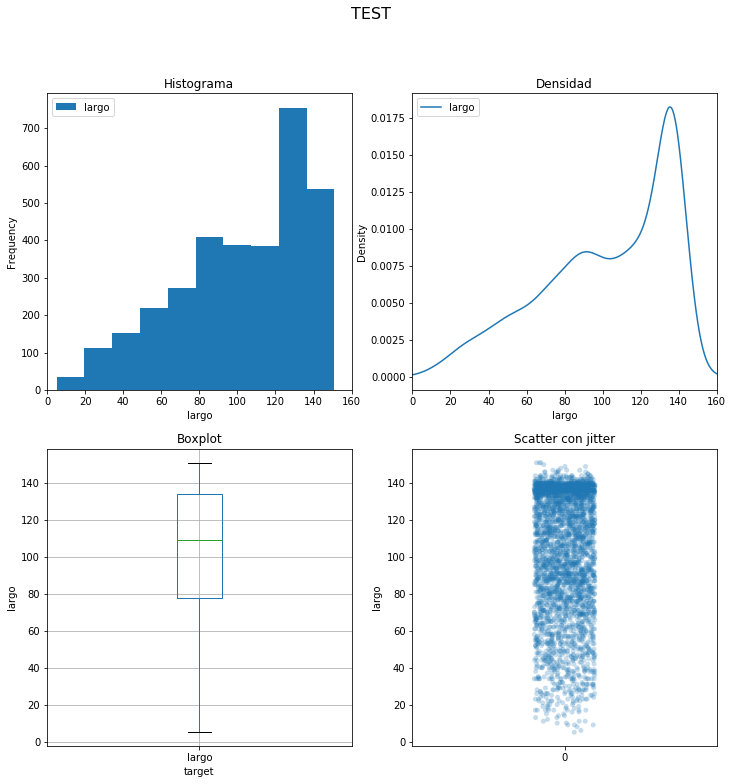

In [34]:
# Creo columna con longitud de cada texto
test['largo'] = test['text'].str.len()
# chequeo: test.sort_values(by='largo')

# Agrupo por target
#grouped = test.groupby(['target'])
# chequeo estadísticos: grouped.agg({'largo':'describe'}) 

# Grafico
fig = plt.figure()

ax1 = fig.add_subplot(221)
test['largo'].plot(
    kind='hist', title='Histograma', legend=True, xlim=(0, 160), figsize=(12,12))
ax1.set_xlabel('largo')

ax2 = fig.add_subplot(222)
test['largo'].plot(
    x='largo', kind='kde', title='Densidad', legend=True, xlim=(0, 160), figsize=(12,12))
ax2.set_xlabel('largo')

ax3 = fig.add_subplot(223)
test.boxplot(
    column='largo', ax=ax3, figsize=(12,12))
ax3.set_title('Boxplot'), ax3.set_xlabel('target'), ax3.set_ylabel('largo')

ax4 = fig.add_subplot(224)
sns.stripplot(x=[0]*len(test), y='largo', data=test, alpha=0.25, jitter=0.1)#,figsize=(12,8));
ax4.set_title('Scatter con jitter')

fig.suptitle('TEST', fontsize=16)
#plt.show()

## TRAIN. Keyword vs target

In [35]:
train

,id,keyword,location,text,target,largo
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


In [36]:
#train['keyword'].fillna('', inplace=True)

In [89]:
train['keyword'].value_counts()

fatalities               45
armageddon               42
deluge                   42
damage                   41
harm                     41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [7]:
# Creo columna con longitud de cada texto
# chequeo: train.sort_values(by='largo')

# Agrupo por target
grouped = train.groupby(['target'])
# chequeo estadísticos: grouped.agg({'largo':'describe'}) 
grouped.groups

{0: Int64Index([  15,   16,   17,   18,   19,   20,   21,   22,   23,   24,
             ...
             7576, 7577, 7578, 7579, 7580, 7581, 7582, 7584, 7587, 7593],
            dtype='int64', length=4342),
 1: Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             7603, 7604, 7605, 7606, 7607, 7608, 7609, 7610, 7611, 7612],
            dtype='int64', length=3271)}

In [9]:
# genero matriz para plot barras horiz con fillna=0
g_unstack = grouped['keyword'].value_counts().unstack().T.fillna(0)
g_unstack['0+1'] = g_unstack[0] + g_unstack[1]
g_unstack.sort_values(by='0+1')

target,0,1,0+1
keyword,,,
radiation%20emergency,4.0,5.0,9.0
inundation,8.0,2.0,10.0
threat,9.0,2.0,11.0
epicentre,11.0,1.0,12.0
forest%20fire,4.0,15.0,19.0
...,...,...,...
sinking,33.0,8.0,41.0
body%20bags,40.0,1.0,41.0
armageddon,37.0,5.0,42.0


<BarContainer object of 221 artists>

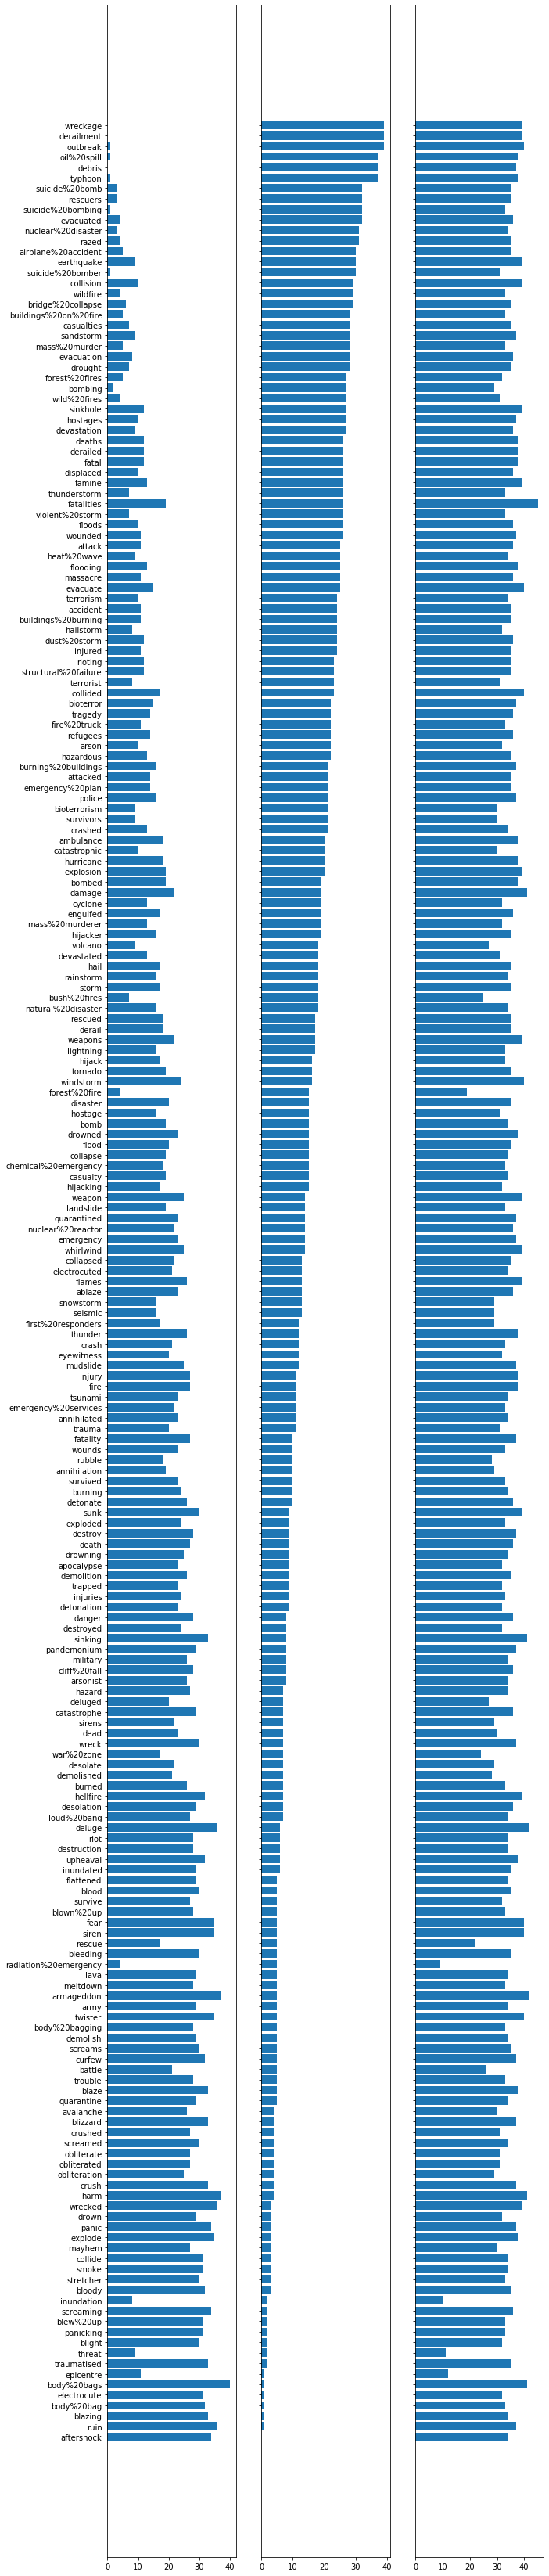

In [46]:
# Grafico
g_sort_1 = g_unstack.sort_values(by=1)

fig = plt.figure(figsize=(10,60))

ax1 = fig.add_subplot(131)
ax1.barh(g_sort_1.index, g_sort_1[0])

ax2 = fig.add_subplot(132)
ax2.barh(g_sort_1.index, g_sort_1[1], tick_label='')
#ax2.set_ylabel('')

ax3 = fig.add_subplot(133)
ax3.barh(g_sort_1.index, g_sort_1['0+1'], tick_label='')

#, interpolation='nearest', cmap=plt.cm.ocean)(kind='bar', figsize=(24, 6))
#ax2 = fig.add_subplot(212)
#train.loc[train['target']==1, 'keyword'].value_counts().sort_values().plot(kind='bar', figsize=(24, 6))

#sns.countplot(train['keyword'])
# grouped['keyword'].plot(
#    kind='hist', title='Histograma', legend=True, figsize=(12,12))
#ax1.set_xlabel('largo')

In [38]:
# cociente 1/0
#g_sort_1['ratio'] = g_sort_1[1] / g_sort_1[0]
g_sort_1['delta/suma'] = (g_sort_1[1] - g_sort_1[0]) / (g_sort_1[1] + g_sort_1[0])
#g_sort_1
#train['keyword'].isin(train['text']).value_counts()
#train
g_sort_1

target,0,1,0+1,ratio,delta/suma
keyword,,,,,
aftershock,34.0,0.0,34.0,0.000000,-1.000000
ruin,36.0,1.0,37.0,0.027778,-0.945946
blazing,33.0,1.0,34.0,0.030303,-0.941176
body%20bag,32.0,1.0,33.0,0.031250,-0.939394
electrocute,31.0,1.0,32.0,0.032258,-0.937500
...,...,...,...,...,...
debris,0.0,37.0,37.0,inf,1.000000
oil%20spill,1.0,37.0,38.0,37.000000,0.947368
outbreak,1.0,39.0,40.0,39.000000,0.950000


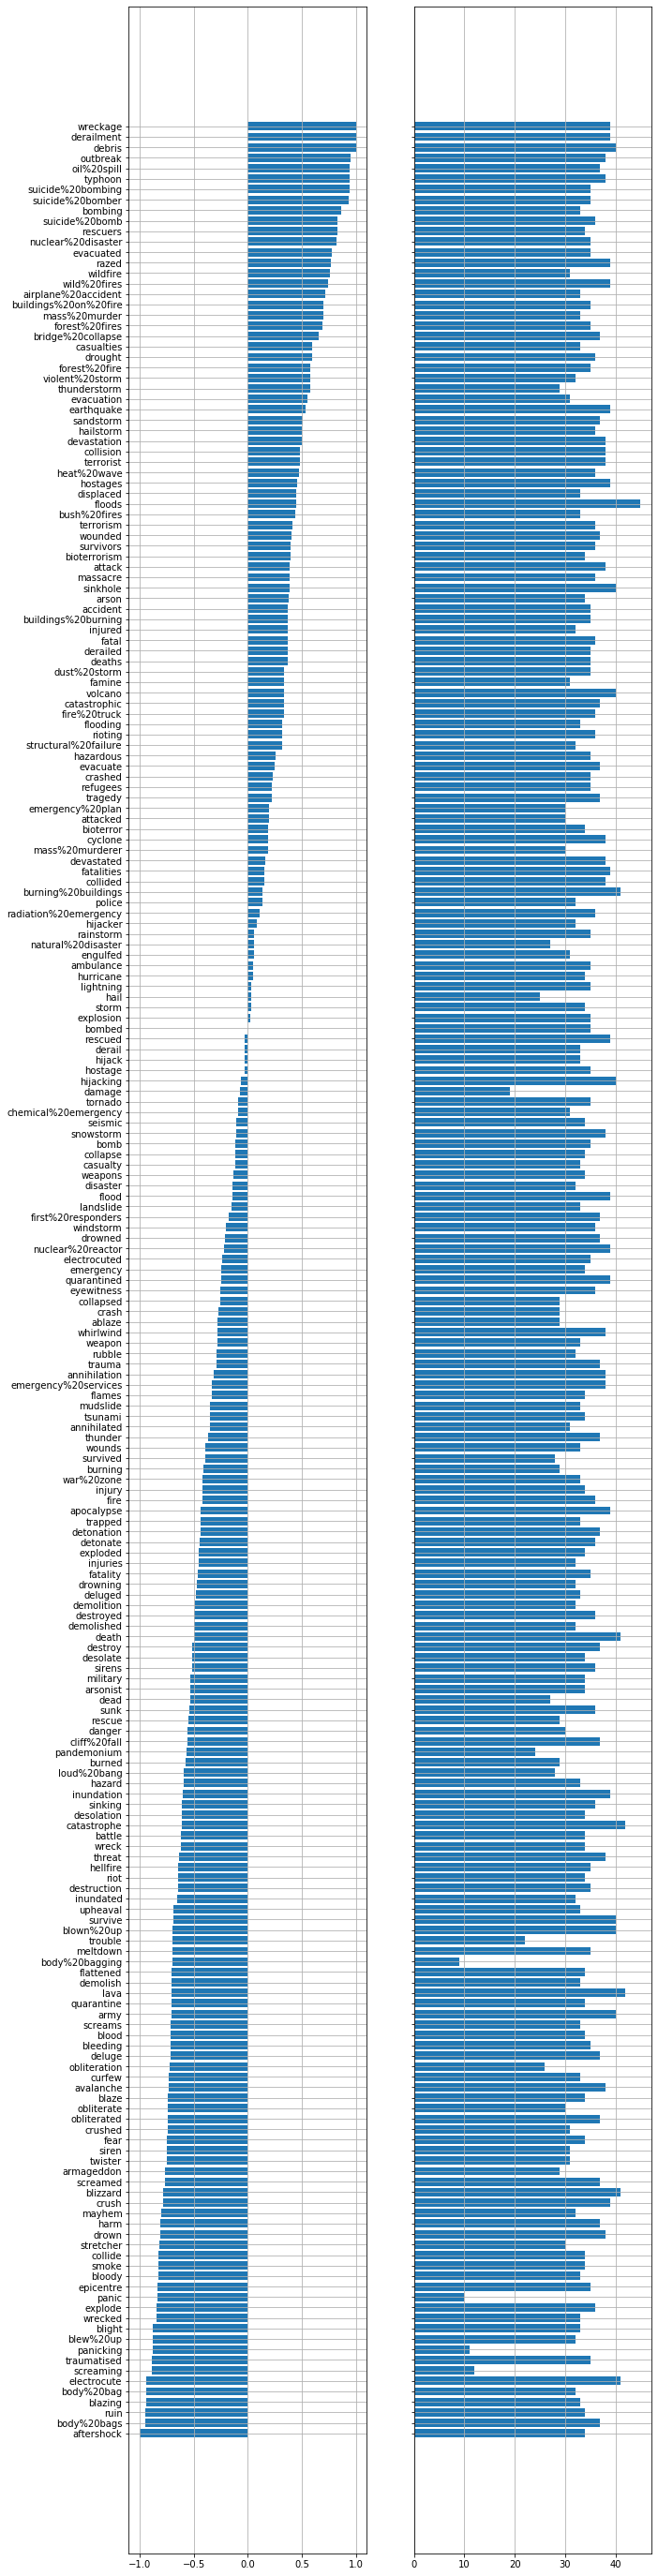

In [49]:
# Grafico
#g_sort_ds = g_sort_1.sort_values(by='delta/suma')

fig = plt.figure(figsize=(10,50))

ax1 = fig.add_subplot(121)
ax1.barh(g_sort_ds.index, g_sort_ds['delta/suma'])
ax1.grid()

ax2 = fig.add_subplot(122)
ax2.barh(g_sort_1.index, g_sort_1['0+1'], tick_label='')
ax2.grid()

Text(0.5, 0.98, 'TRAIN')

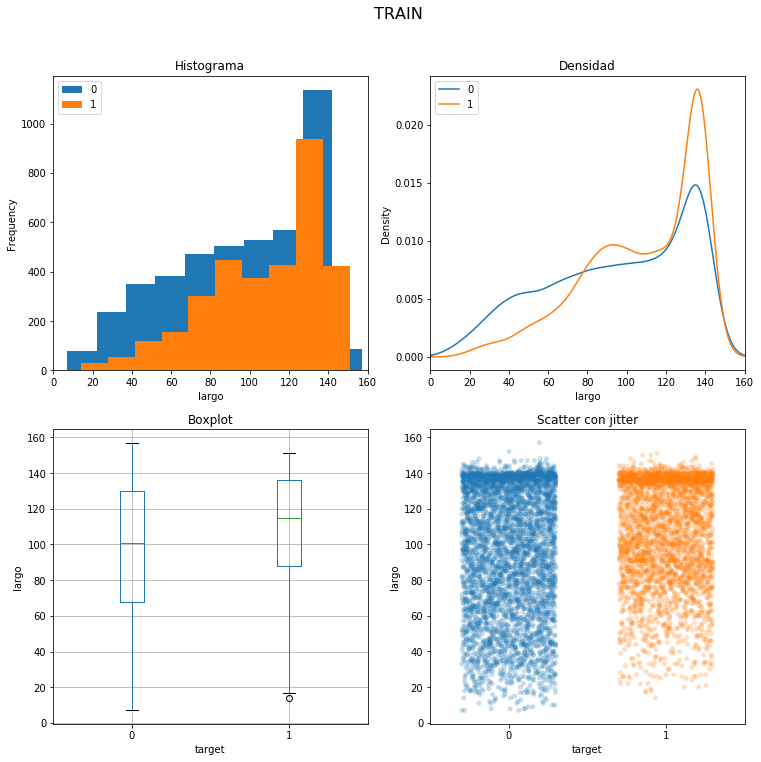

In [33]:
ax2 = fig.add_subplot(222)
grouped['largo'].plot(
    x='largo', kind='kde', title='Densidad', legend=True, xlim=(0, 160), figsize=(12,12))
ax2.set_xlabel('largo')

ax3 = fig.add_subplot(223)
train.boxplot(
    by='target', column='largo', ax=ax3, figsize=(12,12))
ax3.set_title('Boxplot'), ax3.set_xlabel('target'), ax3.set_ylabel('largo')

ax4 = fig.add_subplot(224)
sns.stripplot(x='target',y='largo', data=train, alpha=0.25, jitter=0.3)#,figsize=(12,8));
ax4.set_title('Scatter con jitter')

fig.suptitle('TRAIN', fontsize=16)
#plt.show()